# Ford Go-Bike Dataset Exploration
## by Joshua Oshla Olaku

## Introduction
> This data set represents trips taken by members of the Ford Go Bike service for month of February of 2019. Data consists of info about trips taken by service's members, their types, their age, their gender, stations of starting and ending trips, duration of trips etc.


## Preliminary Wrangling


In [48]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

%matplotlib inline

In [49]:
# load datatset and print few rows of the data
df = pd.read_csv('201902_fordgobike_tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [50]:
# Check structure of the dataset
df.shape

(183412, 16)

In [51]:
# get general description on the data
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [52]:
# Check the individual with birth year == 1878
df[df.member_birth_year==1878]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
27370,1474,2019-02-25 09:28:42.1610,2019-02-25 09:53:17.0680,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,386.0,24th St at Bartlett St,37.752105,-122.419724,6436,Customer,1878.0,Female,No


In [53]:
# check rows with very high duration_sec values
df.query('(duration_sec>50000)')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3401,62452,2019-02-28 00:04:01.3440,2019-02-28 17:24:54.1370,154.0,Doyle St at 59th St,37.841924,-122.288045,213.0,32nd St at Adeline St,37.823847,-122.281193,4683,Subscriber,1989.0,Female,No
5203,83195,2019-02-27 14:47:23.1810,2019-02-28 13:53:58.4330,243.0,Bancroft Way at College Ave,37.869360,-122.254337,248.0,Telegraph Ave at Ashby Ave,37.855956,-122.259795,5781,Subscriber,1962.0,Female,Yes
7268,66065,2019-02-27 15:00:20.6390,2019-02-28 09:21:26.3360,349.0,Howard St at Mary St,37.781010,-122.405666,62.0,Victoria Manalo Draves Park,37.777791,-122.406432,6107,Customer,1994.0,Male,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173365,82385,2019-02-02 13:07:43.0360,2019-02-03 12:00:48.1750,377.0,Fell St at Stanyan St,37.771917,-122.453704,377.0,Fell St at Stanyan St,37.771917,-122.453704,2933,Customer,NaN,NaN,No
174403,67512,2019-02-01 23:54:03.8330,2019-02-02 18:39:16.5750,19.0,Post St at Kearny St,37.788975,-122.403452,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,2769,Subscriber,1996.0,Male,No
176130,59813,2019-02-01 19:54:49.8480,2019-02-02 12:31:43.0430,60.0,8th St at Ringold St,37.774520,-122.409449,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,335,Subscriber,1990.0,Female,No
176987,80891,2019-02-01 11:05:18.9760,2019-02-02 09:33:30.1690,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,55.0,Webster St at Grove St,37.777053,-122.429558,3133,Customer,NaN,NaN,No


In [54]:
# Getting info on the variables of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [55]:
# checking if the dataset has any null values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [56]:
df.start_station_id.nunique()

329

In [57]:
df.start_station_name.nunique()

329

In [58]:
df.duplicated().sum()

0

## Data Quality Issues
> 1. There is an individual with birth year == 1878
> 2. Missing values in member_birth_year, member_gender, and start and end station name and id
> 3. wrong data types in certain columns such as member_birth_year,start_time and end_time, bike_id

## Cleaning the Data

In [59]:
# make a copy of the orginial dataset
bikes = df.copy()

#### define:
correct the individual with birth year == 1878 to 1978

#### code

In [60]:
# locate the entry and change it t0 1987
bikes.loc[27370,'member_birth_year'] = '1987'

#### check

In [61]:
bikes[bikes.member_birth_year==1878]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


### Dealing with missing values

#### define
Drop rows with missing values in the member_gender and member_birth_year columns

#### code

In [62]:
# exclude null rows from the dataset
bikes = bikes.loc[~(bikes.member_gender.isna())&~(bikes.member_birth_year.isna())]

#### check

In [63]:
bikes.shape

(175147, 16)

In [64]:
bikes.member_birth_year.isna().sum()

0

In [65]:
bikes.member_gender.isna().sum()

0

### Dealing with incorrect datatypes

#### define
change incorrect data types

#### code

In [66]:
bikes.member_birth_year = bikes['member_birth_year'].astype('int') # convert to interger
bikes.bike_id = bikes.bike_id.astype('str') # convert to string
bikes.start_time = bikes.start_time.str.split('.').str[0] # remove the nanoseconds (the decimal point)
bikes.end_time = bikes.end_time.str.split('.').str[0] # remove the values after the decimal point
bikes.start_time = pd.to_datetime(bikes['start_time'], format='%Y-%m-%d %H:%M:%S.%f') # change the column into datetime format
bikes.end_time = pd.to_datetime(bikes['end_time'], format='%Y-%m-%d %H:%M:%S.%f')# change the column into datetime format


In [67]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             175147 non-null  int64         
 1   start_time               175147 non-null  datetime64[ns]
 2   end_time                 175147 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   175147 non-null  float64       
 6   start_station_longitude  175147 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     175147 non-null  float64       
 10  end_station_longitude    175147 non-null  float64       
 11  bike_id                  175147 non-null  object        
 12  user_type       

### What is the structure of your dataset?

> The dataset contains 16 variables/columns and 183,412 rows which have been cut down to 175,147 rows after cleaning

### What is/are the main feature(s) of interest in your dataset?

> My main feature of interest in this dataset is 'duration_sec' which is the amount of time an individual rode his/her bike and i'm going to be looking at what variables influence the amount of time a person rides his/her bike

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I feel the member_gender and age should be a strong determinant of the duration of time that a user takes rides, because men seem to have more endurance when it comes to physical strength. Also, another determing variable could be the 'member_birth_year' because younger folks seem to have more physical strentgh and energy.

## Univariate Exploration

I'll begin by checking out the duration_second variable which is the variable of interest

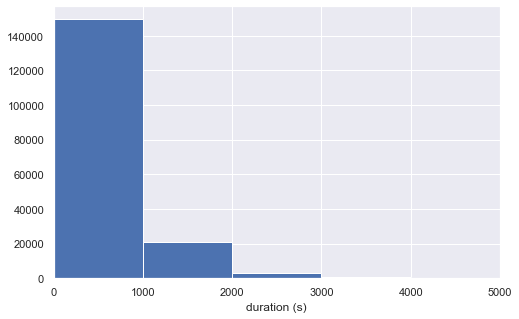

In [68]:
# start with a standard scaled plot to see the distribution
binsize = 1000
bins = np.arange(0, bikes['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bikes, x = 'duration_sec', bins = bins)
plt.xlabel('duration (s)')
plt.xlim(0,5000)
plt.show()

The distribution does not show anything meaningful. Most of the durations are less than 5000 seconds. Some duration_sec are over 50000 and should be considered as outliers. xlim is added to help zoom into the data. Durations greater than 7,000 should therefore be dropped from the dataset.


In [69]:
# Drop all columns with duration_sec great than 7,000 sec
bikes = bikes[bikes.duration_sec<=7000]

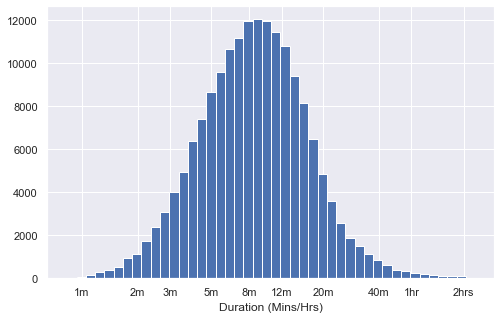

In [70]:
# apply log transformation in order to view the distribution closer because their is a long tail in the distribution
log_binsize = 0.05
bins = 10 ** np.arange(1.7, np.log10(bikes['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bikes, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([60,120, 180, 300, 480, 720, 1200, 2400,3600, 6900], ['1m','2m','3m', '5m','8m', '12m', '20m', '40m','1hr', '2hrs'])
plt.xlabel('Duration (Mins/Hrs)')
plt.xlim(right=10000);

On a log scale, distribution of time seems to be a bell curved distribution or a normal distribution with a little right skew and the highest peak of time duration being around 500 to 700 seconds. This is an interesting distribution of time

Next let's take a look at some of the predictor variables

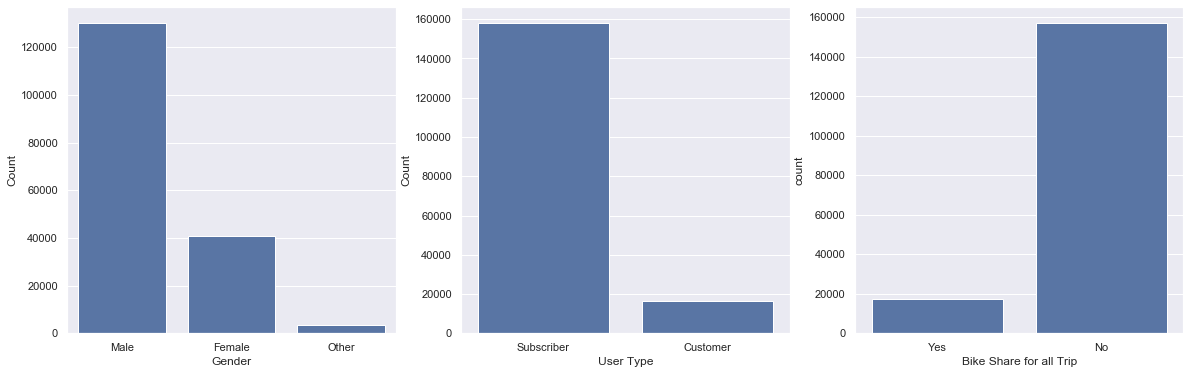

In [71]:
# Plotting the distribution of the member gender and user type and bike share for all trip
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
base_color = sb.color_palette()[0]
sb.countplot(data = bikes, x = 'member_gender',color=base_color)
plt.xlabel('Gender',fontsize=12)
plt.ylabel('Count',fontsize=12)

plt.subplot(1,3,2)
sb.countplot(data=bikes,x='user_type',color=base_color);
plt.xlabel('User Type',fontsize=12)
plt.ylabel('Count',fontsize=12);

plt.subplot(1,3,3)
sb.countplot(data=bikes,x='bike_share_for_all_trip',color=base_color);
plt.xlabel('Bike Share for all Trip');


There is an a wide gap between the number of men and women bike share users. The third category could be those who have refused to identify their gender or who simply do not want to be categorized into any gender. It is not surprising to see that their are more male riders than women. What may be surprising is the wide gap between them. The gap between subscribers and customers is very wide, this means that most of FOrd Go-bike share users are subscribers.

Let's go further to see the distribution of age of members. To do this I will create a new variable called age from the member_birth_year variable

In [72]:
# create new column with age from member_birth_year
bikes['age'] = 2019 - bikes.member_birth_year
bikes.age = bikes.age.astype('int64')

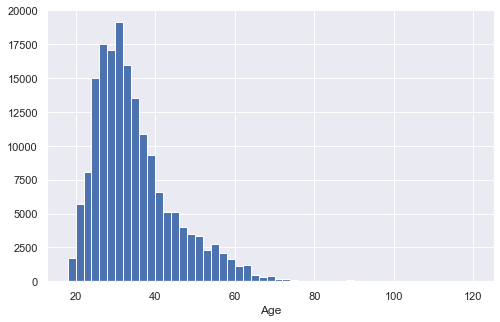

In [73]:
binsize = 2
bins = np.arange(bikes['age'].min(), bikes['age'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bikes, x = 'age',bins=bins)
plt.xlabel('Age');

The plot above shows some possible outliers in the ages of members. Reasoning logically, most people older than 70 years may not be able to ride bikes any longer or may not be strong enough to do so. Another plot can be created taking out those rows with members older than 70 years as they may be outliers

In [74]:
bikes = bikes[bikes.age<70] # remove rows with age over 70 years

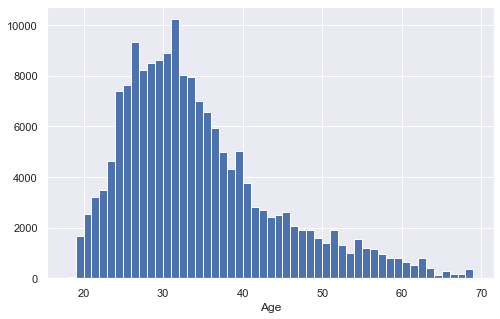

In [75]:
# Plot the age distribution again
binsize = 1
bins = np.arange(bikes['age'].min(), bikes['age'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bikes, x = 'age',bins=bins)
plt.xlabel('Age');

The distribution seems to be skewed to the right which is logical, because older people may not ride bikes often or may not want to use bikes as a means of transportation. On the other hand, younger people have all the energy. It is interesting to see that most people between the age of 26 to 32 there about mostly rent and use bikes. As age advances according to the plot there are lesser number of riders.

Next we check the day of the week with the most bike use or rent. To do that we will create a new feature called day and time_of_day

In [76]:
# Get the day and time (hour) from the dates column

# import the datetime library
import datetime as dt
bikes['day'] = bikes['start_time'].dt.day_name() # get the day name
bikes['time_of_day'] = bikes['start_time'].dt.hour # get the hour

In [77]:
# Create the order
ord_dict = {'day': ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']}

for var in ord_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ord_dict[var])
        bikes[var] = bikes[var].astype(ordered_var)
    else: # pre-v0.21
        bikes[var] = bikes[var].astype('category', ordered = True,
                                             categories = ord_dict[var])

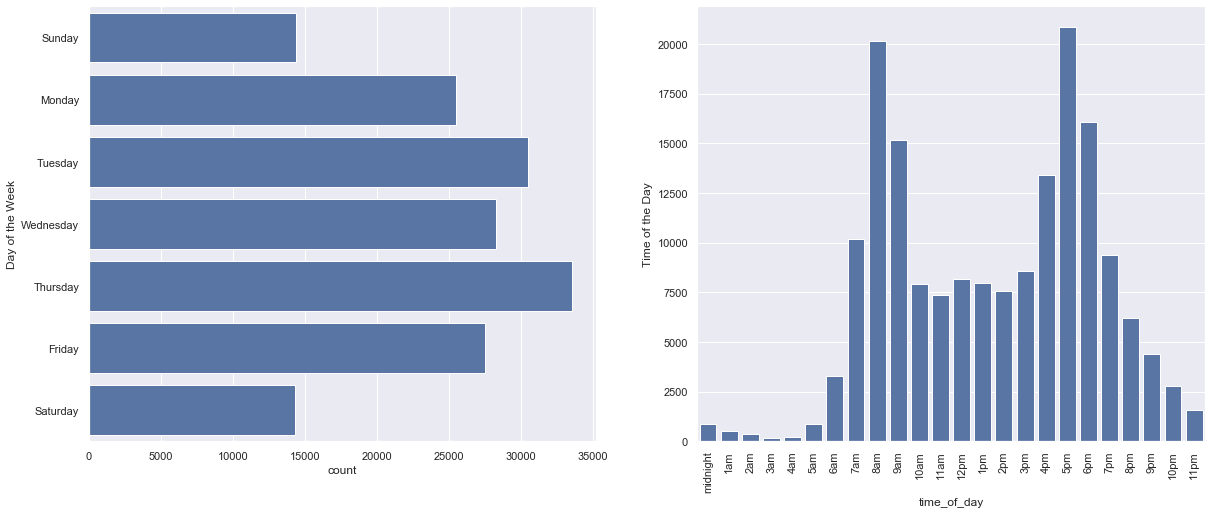

In [78]:
# create subplots to see days of the week with the most bike shares and time of the day
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
base_color = sb.color_palette()[0]
sb.countplot(data=bikes,y='day',color=base_color)
plt.ylabel('Day of the Week');

plt.subplot(1,2,2)
sb.countplot(data=bikes,x='time_of_day',color=base_color)
plt.ylabel('Time of the Day')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
          ['midnight','1am','2am','3am','4am','5am','6am','7am','8am','9am','10am','11am','12pm','1pm','2pm',
          '3pm','4pm','5pm','6pm','7pm','8pm','9pm','10pm','11pm']);
plt.xticks(rotation=90)
plt.show()

The plot shows that Thursday has the most bike usage followed by Tuesday. What could be the cause of this? On the weekends which is Saturdays and Sunday, the bike usage is lowest. The time of day distribution is bimodal in nature, having 2 peaks at 8am and the highest peak at around 5pm. This were periods where the most rides were taken.


In [79]:
# create a sub data set with top ten most popular start and end stations
bikes_start_count = bikes.start_station_name.value_counts()
start_index = bikes_start_count.index[:11]
bikes_start_data = bikes.loc[bikes['start_station_name'].isin(start_index)]

bikes_end_count = bikes.end_station_name.value_counts()
end_index = bikes_end_count.index[:11]
bikes_end_data = bikes.loc[bikes['end_station_name'].isin(end_index)]

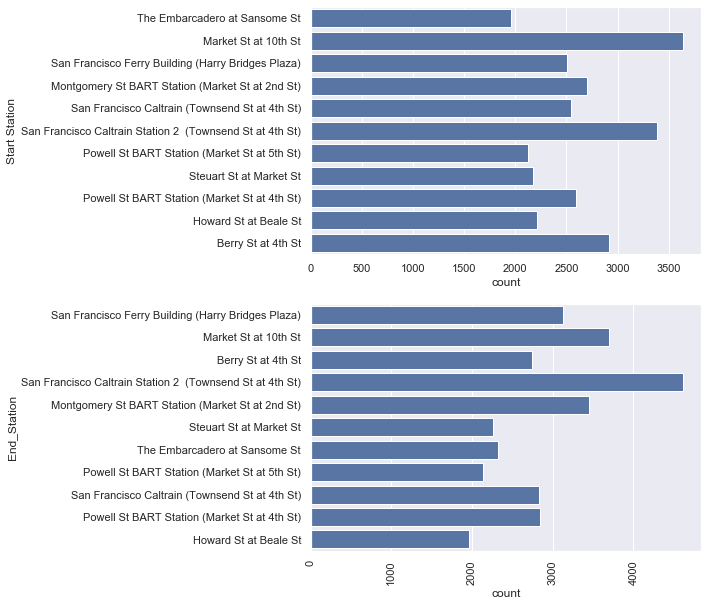

In [80]:
# create subplots to see top 10 most popular start and end stations
plt.figure(figsize=(7,10))

plt.subplot(2,1,1)
base_color = sb.color_palette()[0]
sb.countplot(data=bikes_start_data,y='start_station_name',color=base_color)
plt.ylabel('Start Station');

plt.subplot(2,1,2)
sb.countplot(data=bikes_end_data,y='end_station_name',color=base_color)
plt.ylabel('End_Station')
plt.xticks(rotation=90)
plt.show()

The plot reveals that the most popular bikes share start station is Market St at 10th St and the most common end station is  San Francisco Caltrain Station 2 (Townsend St at 4th St)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration values took on a range of values. To get a closer and better look at the data log transformation was applied. The plot of the transformed data appeared normal with a little skew to the right

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The durations variable had some extreme figures which were considered outliers and seemed inconsistent with the rest of the data. These values were dropped from the dataset

## Bivariate Exploration

> To start off, I want to explore the pairwise correlation that exist between the variables in the dataset especially with durations

In [81]:
# get a list of all numerical and categorical variable of interest
numerical_vars = ['duration_sec','age']
cat_vars = ['day','user_type','member_gender','time_of_day']

In [82]:
bikes['log_duration'] = np.log10(bikes.duration_sec)
bikes['cube_age'] = np.cbrt(bikes['age'])

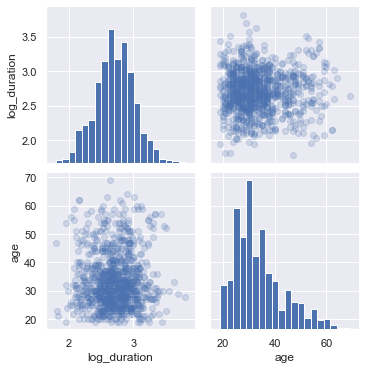

In [83]:
# plot some samples of the data in order to have a clearer view of the relationship

g = sb.PairGrid(data = bikes.sample(1000), vars = ['log_duration','age'])
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter,alpha=0.2)

<Figure size 1440x720 with 0 Axes>

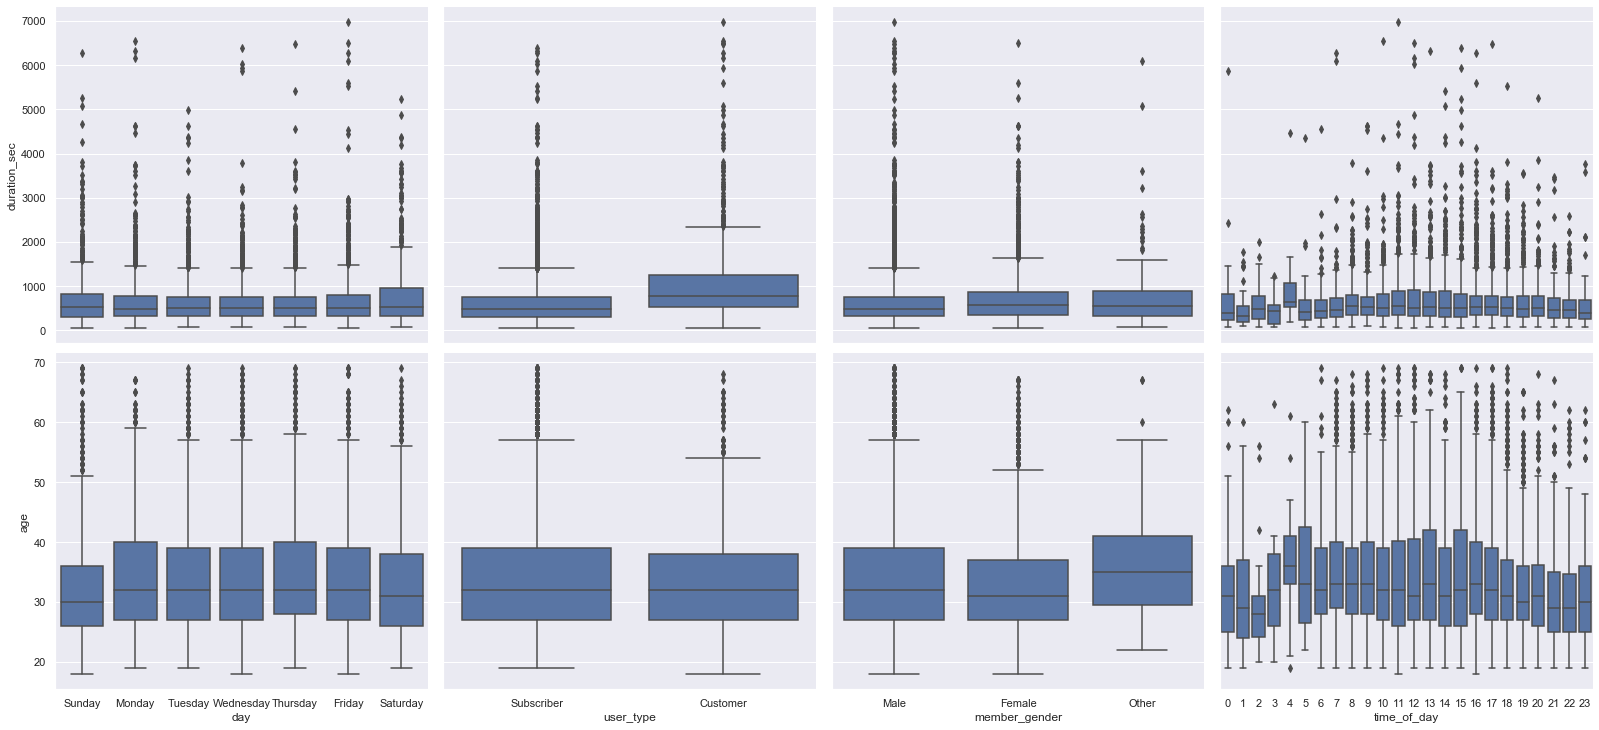

In [84]:
# Create a function that plots a boxplot
def boxgrid(x, y, **kwargs):
    """ function for creating box plots with seaborn's PairGrid. """
    base_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = base_color)

plt.figure(figsize = [20, 10])
g = sb.PairGrid(data = bikes.sample(10000), y_vars = numerical_vars, x_vars = cat_vars,aspect=1.1,
                height = 5)
g.map(boxgrid)
plt.show();

From above, the day of the week with the longest ride durations are sundays and saturdays which are weekends and these ride appear to be taken by younger folks. This is interesting because from the univariate plot done earlier, they appeared to be the days with the least number of rides. Also, subscribers ride lesser durations than customers even though there are more subscribers than customers.

Investigating the dataset further, lets look at the relationship between some of the categorical variables


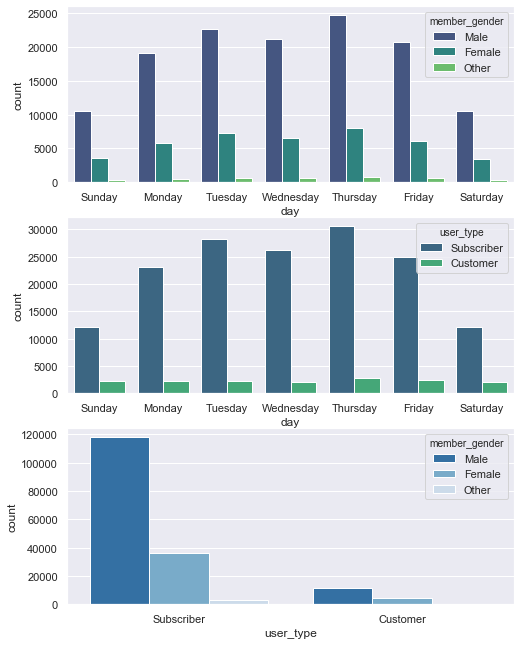

In [85]:
plt.figure(figsize = [8, 11])

# subplot 1: day vs member_gender
plt.subplot(3, 1, 1)
sb.countplot(data = bikes, x = 'day', hue = 'member_gender', palette = 'viridis')

# subplot 2: day vs. user_type
ax = plt.subplot(3, 1, 2)
sb.countplot(data = bikes, x = 'day', hue = 'user_type', palette = 'viridis')

# subplot 3: user_type vs. member_gender
ax = plt.subplot(3, 1, 3)
sb.countplot(data = bikes, x = 'user_type', hue = 'member_gender', palette = 'Blues_r')
plt.show()

Most rides seem to be taken on thursdays by males who are subscribers. There also seem to be more subscribers than customers, of which are mostly males than females and others.

Next lets take a closer look at the relationship between duration and age riders

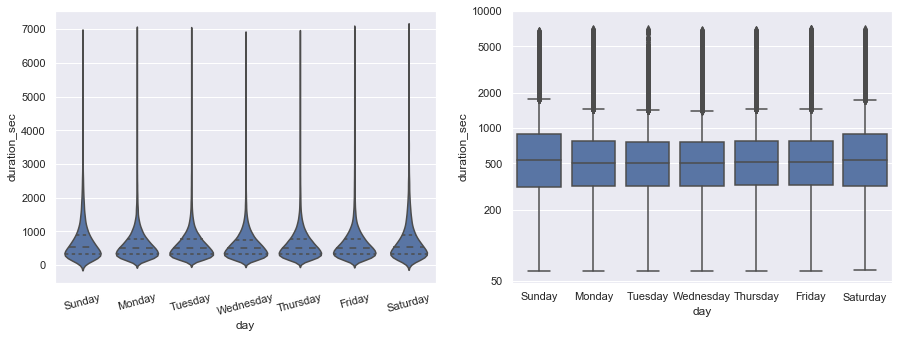

In [86]:
base_color = sb.color_palette()[0]
plt.figure(figsize=[15,5])

ticks = [50,200,500,1e3,2e3,5e3,1e4]
labels = ['50','200','500','1000','2000','5000','10000']

plt.subplot(1,2,1)
sb.violinplot(data=bikes, x='day', y='duration_sec',color=base_color,inner='quartile');

plt.xticks(rotation=15)

plt.subplot(1,2,2)
sb.boxplot(data=bikes,x='day',y='duration_sec',color=base_color)
plt.yscale('log')
plt.yticks(ticks,labels);


The longest ride durations appear to happen saturdays and sundays. Next let's look at the start and end station name against the time duration

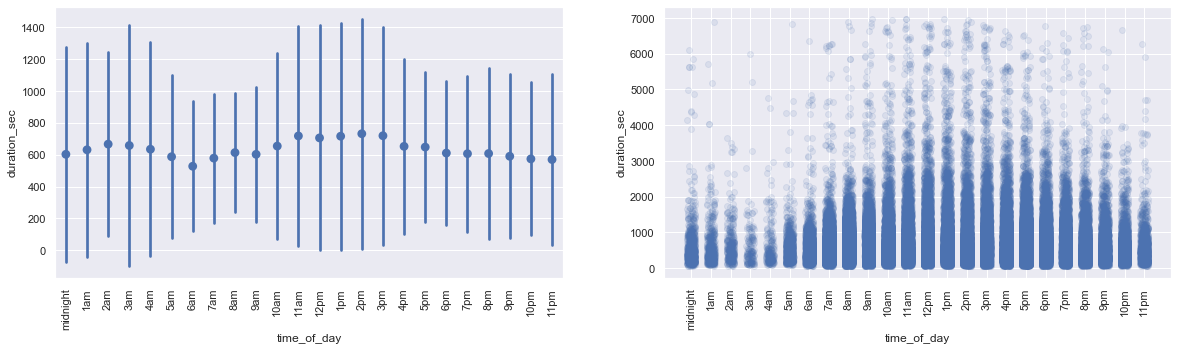

In [87]:
x_ticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
x_labels = ['midnight','1am','2am','3am','4am','5am','6am','7am','8am','9am','10am','11am','12pm','1pm','2pm',
          '3pm','4pm','5pm','6pm','7pm','8pm','9pm','10pm','11pm']
plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
sb.pointplot(data=bikes, x='time_of_day', y='duration_sec',ci='sd', linestyles="")
plt.xticks(x_ticks,x_labels)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sb.regplot(data = bikes, x = 'time_of_day', y = 'duration_sec',fit_reg=False, x_jitter=0.2,scatter_kws=({'alpha':0.1}))
plt.xticks(x_ticks,x_labels)
plt.xticks(rotation=90)
plt.show()


The pointplot shows that the longest rides were taken around 2pm and also 3am. It is interesting because 3am seems to be an odd hour to take rides. There seems to not be any correlation bewteen time of the day and the duration of rides

In [88]:
bikes_start_count = bikes.start_station_name.value_counts()
start_index = bikes_start_count.index[:11]
bikes_start_data = bikes.loc[bikes['start_station_name'].isin(start_index)]

bikes_end_count = bikes.end_station_name.value_counts()
end_index = bikes_end_count.index[:11]
bikes_end_data = bikes.loc[bikes['end_station_name'].isin(end_index)]

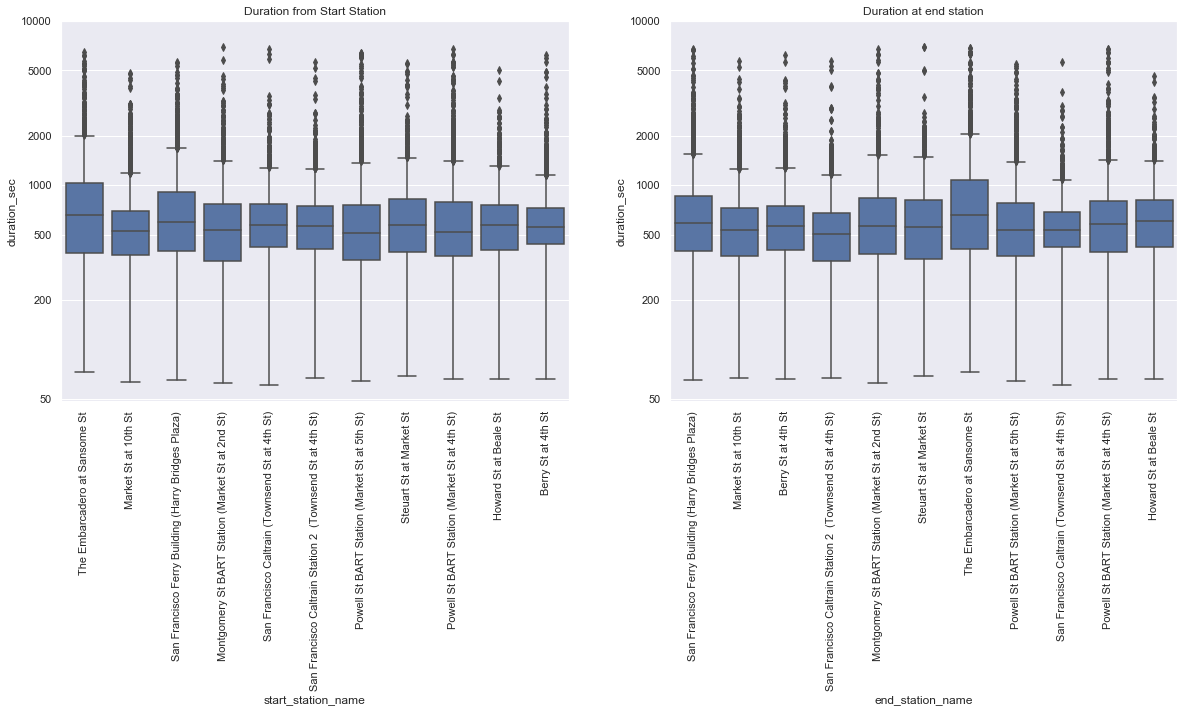

In [89]:
# create boxplot to see the relationship between start and end locations against duration
ticks = [50,200,500,1e3,2e3,5e3,1e4]
labels = ['50','200','500','1000','2000','5000','10000']
plt.figure(figsize=[20,7])

plt.subplot(1,2,1)
sb.boxplot(data=bikes_start_data, x='start_station_name', y='duration_sec',color=base_color)
plt.yscale('log')
plt.yticks(ticks,labels)
plt.title("Duration from Start Station")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sb.boxplot(data=bikes_end_data, x='end_station_name', y='duration_sec',color=base_color)
plt.yscale('log')
plt.yticks(ticks,labels)
plt.xticks(rotation=90)
plt.title('Duration at end station')
plt.show()


The longest ride durations taken as suggested by the plot seem to be rides to and from 'The Embarcadero at Sansome St'. Scaling was applied to durations to zoom into the plot

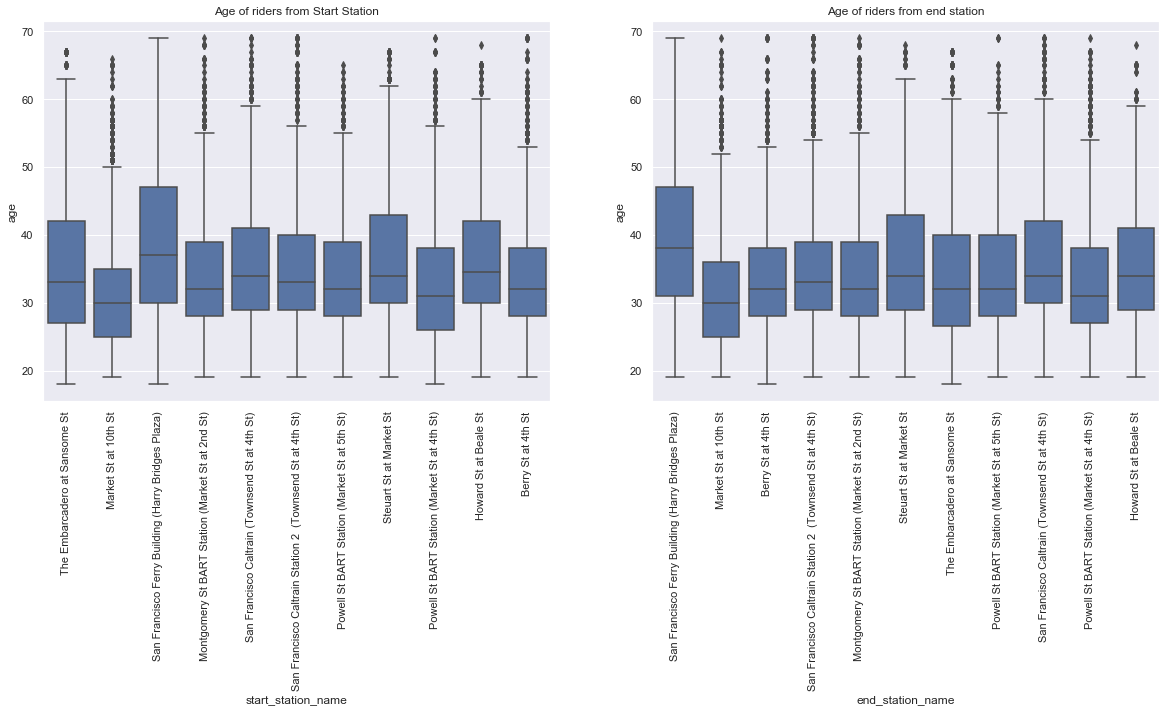

In [90]:
# plot start and end station according to the age of various riders

plt.figure(figsize=[20,7])

plt.subplot(1,2,1)
sb.boxplot(data=bikes_start_data, x='start_station_name', y='age',color=base_color)
plt.title("Age of riders from Start Station")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sb.boxplot(data=bikes_end_data, x='end_station_name', y='age',color=base_color)
plt.xticks(rotation=90)
plt.title('Age of riders from end station')
plt.show()


This plot suggest that the most common start and end station seems to be 'San Francisco Ferry Building (Harry Bridges Plaza)' and it is frequented by mostly middle aged people

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Duration of bike rides seemed to not have any correlation with the age of the riders as expected. It was expected that ride durations should decrease with increase in age but it interestingly does not seem to be so. It is suggested that the longest rides take place on saturdays and sundays from the start and end staion named 'The Embarcadero at Sansome St', and these rides are at 3am and 2pm.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Most of the riders seems to be males who are subscribers and not customers. one of the plots suggested that 'San Francisco Ferry Building (Harry Bridges Plaza)' may the most used start and end station by middle aged riders.
Furthermore, it would be interesting to ivestigate further the relationship between more than two features

## Multivariate Exploration

> In this section, I would like to investigate further the gender and type of bike share users that have the longest bike ride durations and also discover other interesting relationships between variables

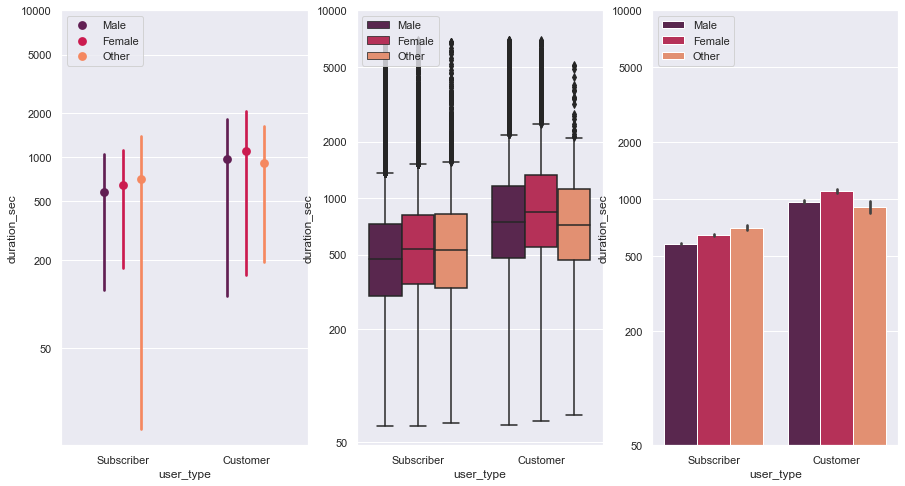

In [91]:
# plot duration against user type and member gender

plt.figure(figsize = [15,8])
ticks = [50,200,500,1e3,2e3,5e3,1e4]
labels = ['50','200','500','1000','2000','5000','10000']

plt.subplot(1,3,1)
ax = sb.pointplot(data = bikes, x = 'user_type', y = 'duration_sec', 
                  hue = 'member_gender',dodge=0.3,palette='rocket',join=False,ci='sd')
plt.yscale('log')
plt.yticks(ticks,labels)
plt.legend(loc='upper left') # re-arrange legend to upper left position


plt.subplot(1,3,2)

sb.boxplot(data=bikes, x='user_type', y='duration_sec',hue='member_gender',palette='rocket')
plt.yscale('log')
plt.yticks(ticks,labels)
plt.legend(loc='upper left') # re-arrange legend to upper left position

plt.subplot(1,3,3)
sb.barplot(data=bikes, x='user_type', y='duration_sec',hue='member_gender',palette='rocket')
plt.yscale('log')
plt.yticks(ticks,labels)
plt.legend(loc='upper left') # re-arrange legend to upper left position


plt.show()


The plots suggests that female customers tend to have longer ride durations even tho we discovered earlier that their are more male subscribers and customers than female ones

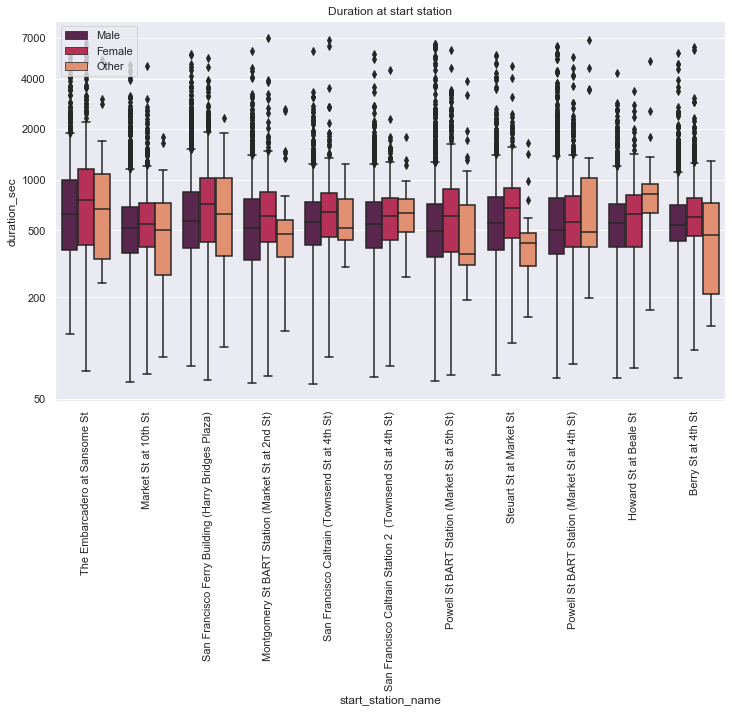

In [92]:
plt.figure(figsize = [12,7])


ticks = [50,200,500,1e3,2e3,4e3,7e3]
labels = ['50','200','500','1000','2000','4000','7000']

sb.boxplot(data=bikes_start_data, x='start_station_name', y='duration_sec',hue='member_gender',palette='rocket')
plt.yscale('log')
plt.yticks(ticks,labels)
plt.xticks(rotation=90)
plt.legend(loc=2) # reposition the legend
plt.title('Duration at start station')
plt.show()


Female bike share users also seem to be the most frequent people to start their rides at the start station.

In [93]:
sub_bikes_data = bikes.loc[(bikes.member_gender != 'Other')] # select only columns with male and female values

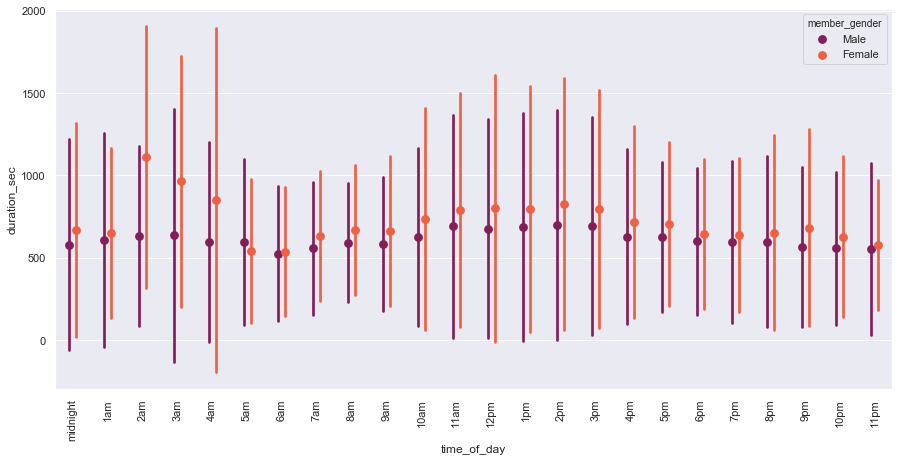

In [94]:
# plot duration against time of day and member gender (male and female)

plt.figure(figsize=[15,7])
x_ticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
x_labels = ['midnight','1am','2am','3am','4am','5am','6am','7am','8am','9am','10am','11am','12pm','1pm','2pm',
          '3pm','4pm','5pm','6pm','7pm','8pm','9pm','10pm','11pm']

sb.pointplot(data=sub_bikes_data, x='time_of_day', y='duration_sec',hue='member_gender',
             ci='sd', linestyles="",dodge=0.2,palette='rocket')
plt.xticks(x_ticks,x_labels)
plt.xticks(rotation=90)
plt.show()

Again from this plot, it seems that females take the longest rides at about 2am. This is counter-intuitive because males take the most rides but with shorter durations than the females. The 'Other' category was dropped out of this analysis since we don't really know whether they are actually males or female who have refused to disclose their genders.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I further investigated the duration in seconds agianst some of the categorical variable such as gender of members, time and station name. Even though the dataset initially showed that there were more males than females, longer ride durations appears to be taken by females at almost every given time and at the start station by customers and not subscribers who are females.
### Were there any interesting or surprising interactions between features?

> It is interesting to see that males taking rides were more than females and 'Other' category, but on the other hand, these females appeared to have longer ride durations than the male. This could be because males ride faster due to more strength they moslty possess than females.

## Conclusions
> In summary the main findings of this exploration suggest that bike ride durations were more around the 500 seconds (8mins). These rides were taken more by males and females of around 30 years of age who are subscribers. Further investigation suggested that the longest rides were those done by females who are under the 'customer' user type category around 2am. The most used start and end station appears to be 'Market St at 10th St' and San Francisco Caltrain Station 2 (Townsend St at 4th St)', even though the one with longest duration appears to be 'The Embarcadero at Sansome St' which again has more female customer users than men. In general it the exploration suggests that though there are more male users than female, the female users usually take longer rides duration than males. It could be that they ride more slowly than the males.
